In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
print("dxv")

dxv


In [27]:
df=pd.read_csv('G:/redcarpet/final_by_feature_importance_mutualinfoscore.csv')
df.head()


,Unnamed: 166,Unnamed: 184,Unnamed: 181,Unnamed: 178,R1) Joint Funding of Investment (with Agencies),Unnamed: 172,Unnamed: 169,P) External Funding Allocation,Unnamed: 163,Unnamed: 141,...,Unnamed: 17,Unnamed: 232,Unnamed: 144,Unnamed: 94,Unnamed: 98,Unnamed: 40,Unnamed: 158,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,5.24,7.19,5.70
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,1,1,0,14.00,14.00,14.00
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,5.00,5.00,4.37
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,4.57,11.79,4.18
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1.63,2.74,2.02


In [28]:
label=pd.read_csv('G:/redcarpet/target.csv')
label.head()
features=df.columns
print(features)
#features=features[1:]
print (features)
df=df[features]
# print df.head()


Index(['Unnamed: 166', 'Unnamed: 184', 'Unnamed: 181', 'Unnamed: 178',
       'R1) Joint Funding of Investment (with Agencies)', 'Unnamed: 172',
       'Unnamed: 169', 'P) External Funding Allocation', 'Unnamed: 163',
       'Unnamed: 141', 'Subagency', 'Unnamed: 224',
       'W) Measurement Instruments Used', 'B) Year Established',
       'Unnamed: 237', 'Unnamed: 153', 'Unnamed: 239', 'Unnamed: 92',
       'Unnamed: 55', 'Unnamed: 21', 'Agency', 'Unnamed: 159', 'Unnamed: 240',
       'Unnamed: 209', 'Unnamed: 107',
       'R2) Joint Funding of Investment (with Other)',
       'Q) Legislation Required to Shift Focus?', 'Unnamed: 175',
       'Unnamed: 128', 'F1) Primary Investment Objective', 'Unnamed: 162',
       'H) Educational Services or Products Produced', 'Unnamed: 177',
       'Y3) Process or Implementation Evaluation Type', 'Unnamed: 165',
       'Unnamed: 26', 'Unnamed: 36', 'Unnamed: 124', 'Unnamed: 180',
       'Unnamed: 52', 'Unnamed: 183', 'Unnamed: 214', 'Unnamed: 44',


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(df, test_size = 0.3,random_state=23)
Y_train,Y_test= train_test_split(label, test_size = 0.3,random_state=23)
Y_train=Y_train['target']
Y_train=Y_train.reshape(176,1)
Y_test=Y_test['target']
Y_test=Y_test.reshape(76,1)
print (Y_train.shape)
print (Y_test.shape)



print("dxf")
#print X_train.describe


(176, 1)
(76, 1)
dxf


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [33]:
p=pd.DataFrame(Y_test)
p.to_csv('G:/redcarpet/test target by feature importance.csv',index=False)


F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


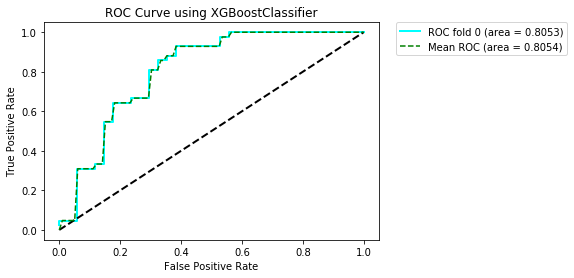

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from itertools import cycle
from sklearn.metrics import roc_curve,auc
from scipy import interp
import matplotlib.pyplot as plt


# skf = StratifiedKFold(n_splits=2,shuffle=False)
# #kf=KFold(n_splits=10,shuffle=True,random_state=23)
# skf.get_n_splits(X_train,Y_train)
# clf = MLPClassifier()
# clf=SVC(C=1,probability=True)
clf=XGBClassifier()


mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)

colors=['cyan']
lw = 2
i = 0


probas_ = clf.fit(X_train,Y_train).predict_proba(X_test)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(Y_test, probas_[:,1])
mean_tpr += interp(mean_fpr, fpr, tpr)
mean_tpr[0] = 0.0
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=lw, color='cyan',label='ROC fold %d (area = %0.4f)' % (i, roc_auc))
i += 1
    
float(df.iloc[i,5]==0)
    
    

plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k')
# mean_tpr /= skf.get_n_splits(X_train,Y_train)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',label='Mean ROC (area = %0.4f)'%(mean_auc))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using XGBoostClassifier')
# plt.legend(loc="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

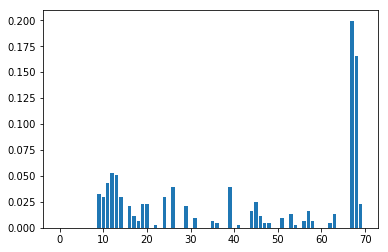

In [35]:
i=0
for e in clf.feature_importances_:
    if e>0.01:
        print e
        i+=1
        print i
        
        
p=pd.DataFrame(clf.feature_importances_)
p.to_csv('feature.csv',index=False)



df=pd.read_csv('G:/redcarpet/new_feature.csv')

df1 = df.sort_values(by=["Feature_Importance"], ascending=False)

df1.to_csv("G:/redcarpet/feature_sorted.csv")
print("done")



plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()
